<a href="https://colab.research.google.com/github/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/pathomics/slide_microscopy_metadata_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring IDC slide microscopy images metadata

[NCI Imaging Data Commons (IDC)](https://imaging.datacommons.cancer.gov) is a cloud-based environment offering a growing collection of publicly available images co-located with the tools and computational resources.

This tutorial demonstrates how to search microscopy images available in IDC programmatically. If you are new to IDC, you can check out other IDC tutorials available in [this repository](https://github.com/ImagingDataCommons/IDC-Tutorials). In particular, you may want to check [this introductory tutorial](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/pathomics/getting_started_with_digital_pathology.ipynb) focused on working with microscopy images.

If you have any questions about this tutorial or about IDC, please ask those on [IDC Forum](https://discourse.canceridc.dev).

--

Initial version: Sept 2024

## Prerequisites

This tutorial depends on [`idc-index`](https://github.com/imagingdatacommons/idc-index) python package that is maintained by IDC and provides convenince interface to IDC content, and several other open source packages for data wrangling and plotting.

In [1]:
%%capture
!pip install --upgrade idc-index
!pip install seaborn

## Accessing microscopy images metadata

In the following, we will instantiate `IDCClient`, which is provided by the `idc-index` package. This class maintains several tables, or _indices_, that contain metadata allowing to search the data in IDC. Metadata accompanying the microscopy images is located in a dedicated index named `sm_index` for "slide microscopy". `sm_index` is not installed by default, and needs to be fetched.

In [2]:
from idc_index import IDCClient

idc_client = IDCClient()
idc_client.fetch_index('sm_index')

With `sm_index` installed, we can examine its content.

In [3]:
idc_client.sm_index

,SeriesInstanceUID,embeddingMedium_CodeMeaning,embeddingMedium_code_designator_value_str,tissueFixative_CodeMeaning,tissueFixative_code_designator_value_str,staining_usingSubstance_CodeMeaning,staining_usingSubstance_code_designator_value_str,min_PixelSpacing_2sf,max_TotalPixelMatrixColumns,max_TotalPixelMatrixRows,ObjectiveLensPower,primaryAnatomicStructure_code_designator_value_str,primaryAnatomicStructure_CodeMeaning,primaryAnatomicStructureModifier_code_designator_value_str,primaryAnatomicStructureModifier_CodeMeaning,illuminationType_code_designator_value_str,illuminationType_CodeMeaning
0,1.3.6.1.4.1.5962.99.1.3319141304.1986252809.16...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00025,113543,78359,40,SCT:15924003,Maxillary sinus,None,None,DCM:111744,Brightfield illumination
1,1.3.6.1.4.1.5962.99.1.3152197829.524344983.163...,[Tissue freezing medium],[SCT:433469005],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00025,101863,25687,40,SCT:68594002,Adrenal cortex,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
2,1.3.6.1.4.1.5962.99.1.1999062777.1863936885.16...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00051,23904,20969,20,SCT:64163001,Head of pancreas,None,None,DCM:111744,Brightfield illumination
3,1.3.6.1.4.1.5962.99.1.1900407564.65707978.1719...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00026,29949,44899,40,SCT:71836000,Nasopharynx,SCT:108369006,Tumor,DCM:111744,Brightfield illumination
4,1.3.6.1.4.1.5962.99.1.2901719137.315580539.168...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00025,49799,17377,40,SCT:117590005,Ear,SCT:24028007,Right,DCM:111744,Brightfield illumination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65996,1.3.6.1.4.1.5962.99.1.2427784968.111358259.172...,[Paraffin wax],[SCT:311731000],[PAXgene Tissue System],[NCIt:C185113],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00049,51791,38136,20,SCT:82082004,Esophageal mucous membrane,None,None,DCM:111744,Brightfield illumination
65997,1.3.6.1.4.1.5962.99.1.2421536925.165092872.172...,[Paraffin wax],[SCT:311731000],[PAXgene Tissue System],[NCIt:C185113],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00049,41831,29919,20,SCT:82082004,Esophageal mucous membrane,None,None,DCM:111744,Brightfield illumination
65998,1.3.6.1.4.1.5962.99.1.2424302797.1358492114.17...,[],[],[Tissue freezing medium],[SCT:433469005],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00049,9959,16298,20,SCT:82082004,Esophageal mucous membrane,None,None,DCM:111744,Brightfield illumination
65999,1.3.6.1.4.1.5962.99.1.2425957569.1826649791.17...,[Paraffin wax],[SCT:311731000],[PAXgene Tissue System],[NCIt:C185113],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00049,41831,30257,20,SCT:82082004,Esophageal mucous membrane,None,None,DCM:111744,Brightfield illumination


In [4]:
print(f'Attributes in sm_index: \n{idc_client.sm_index.dtypes}\n')

Attributes in sm_index: 
SeriesInstanceUID                                              object
embeddingMedium_CodeMeaning                                    object
embeddingMedium_code_designator_value_str                      object
tissueFixative_CodeMeaning                                     object
tissueFixative_code_designator_value_str                       object
staining_usingSubstance_CodeMeaning                            object
staining_usingSubstance_code_designator_value_str              object
min_PixelSpacing_2sf                                          float64
max_TotalPixelMatrixColumns                                     Int64
max_TotalPixelMatrixRows                                        Int64
ObjectiveLensPower                                              Int64
primaryAnatomicStructure_code_designator_value_str             object
primaryAnatomicStructure_CodeMeaning                           object
primaryAnatomicStructureModifier_code_designator_value_str     ob

The columns of this index are extracted from the DICOM metadata contained in the images. Here's a quick explanation of what is in those columns (check out [this notebook](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/pathomics/getting_started_with_digital_pathology.ipynb) for an introduction into how DICOM SM images are organized):
* `SeriesInstanceUID`: this is a unique identifier of the DICOM series containing the image: one DICOM series = one slide
* `embeddingMedium`, `tissueFixative` and `staining_usingSubstance` describe processing the specimen underwent before the image was obtained
* `max_TotalPixelMatrixColumns` and `max_TotalMatrixRows` are the dimensions of the image at the maximum resolution
* `min_PixelSpacing_2sf`: pixel spacing at the maximum resolution layer, rounded to 2 significant figures
* `ObjectiveLensPower`: power of the objective lens of the equipment used to digitize the slide
* `primaryAnatomicStructure`: anatomic location from where the imaged specimen was collected
* `primaryAnatomicStructureModifier`: this column may contain additional characteristics of the specimen, such as whether it is a tumor or normal tissue

`sm_index` is just a pandas dataframe. In the following we make a plot that - effectively - counts the number of slides digitized using different objective lens power.

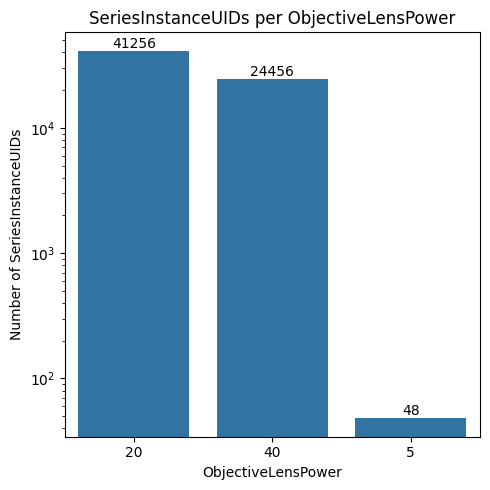

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of items in SeriesInstanceUID for each distinct ObjectiveLensPower
count_data = idc_client.sm_index.groupby('ObjectiveLensPower')['SeriesInstanceUID'].count().reset_index()
count_data = count_data.sort_values('SeriesInstanceUID', ascending=False)

# Convert ObjectiveLensPower to string to treat it as a categorical variable
count_data['ObjectiveLensPower'] = count_data['ObjectiveLensPower'].astype(str)

# Create the bar plot
plt.figure(figsize=(5, 5))
ax = sns.barplot(x='ObjectiveLensPower', y='SeriesInstanceUID', data=count_data,
                 order=count_data['ObjectiveLensPower'])
ax.set_yscale('log')

# Add count labels on top of each bar
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Customize the plot
plt.title('SeriesInstanceUIDs per ObjectiveLensPower')
plt.xlabel('ObjectiveLensPower')
plt.ylabel('Number of SeriesInstanceUIDs')


# Show the plot
plt.tight_layout()
plt.show()

Once you have an idea about the values for a given metadata attribute, you can subset the slides that have a specific value. In the next cell we select all slides that were scanned with 5x `ObjectiveLensPower`.

In [8]:
slides_5x = idc_client.sm_index[idc_client.sm_index['ObjectiveLensPower'] == 5]
slides_5x

,SeriesInstanceUID,embeddingMedium_CodeMeaning,embeddingMedium_code_designator_value_str,tissueFixative_CodeMeaning,tissueFixative_code_designator_value_str,staining_usingSubstance_CodeMeaning,staining_usingSubstance_code_designator_value_str,min_PixelSpacing_2sf,max_TotalPixelMatrixColumns,max_TotalPixelMatrixRows,ObjectiveLensPower,primaryAnatomicStructure_code_designator_value_str,primaryAnatomicStructure_CodeMeaning,primaryAnatomicStructureModifier_code_designator_value_str,primaryAnatomicStructureModifier_CodeMeaning,illuminationType_code_designator_value_str,illuminationType_CodeMeaning
14642,1.3.6.1.4.1.5962.99.1.1158178852.2126151068.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.002,10287,3969,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
14648,1.3.6.1.4.1.5962.99.1.1406625625.143062310.163...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,7014,4359,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
14755,1.3.6.1.4.1.5962.99.1.1444154427.1890375747.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.002,7949,8641,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
14855,1.3.6.1.4.1.5962.99.1.1457224429.1516501177.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.002,9352,4472,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
15005,1.3.6.1.4.1.5962.99.1.1138367295.641551403.163...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,5143,5523,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
15206,1.3.6.1.4.1.5962.99.1.1456907365.1074542557.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,4208,8737,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
15680,1.3.6.1.4.1.5962.99.1.1444087361.1178802190.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,7014,4390,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
15874,1.3.6.1.4.1.5962.99.1.1417610265.99830249.1637...,[Tissue freezing medium],[SCT:433469005],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.002,9352,7152,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
15906,1.3.6.1.4.1.5962.99.1.1146638441.2120788688.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,9352,4666,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
15950,1.3.6.1.4.1.5962.99.1.1161772215.1881002667.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.002,11223,6210,5,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination


Examining distinct values of the staining substance is a bit more involved, since there may be more than one such substance used (as an example, hematoxylin and eosin are often used together). This means that this column contains arrays, and to account for this we first "explode" this column - this will create a separate row for each element of the array.

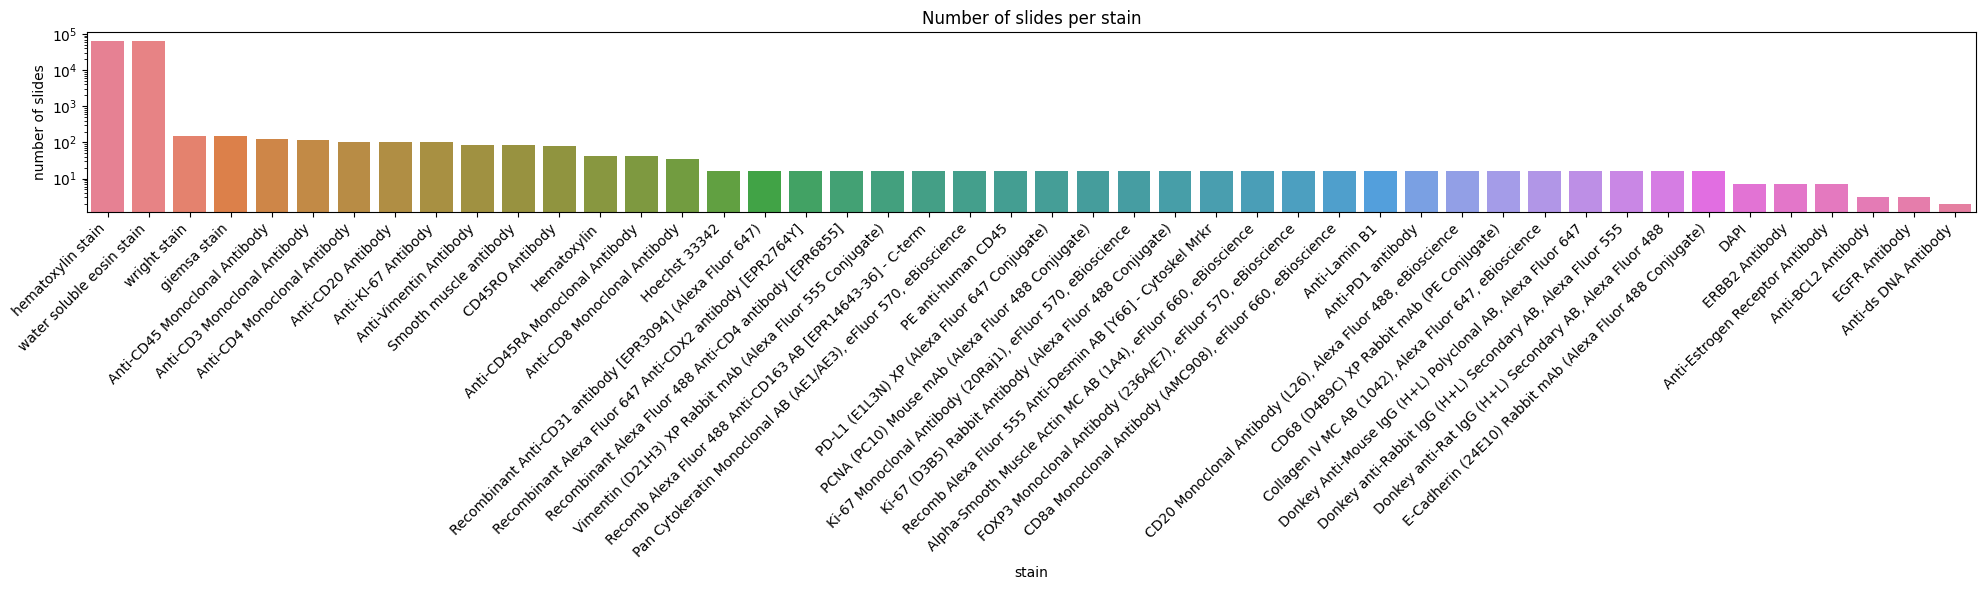

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# here we create a separate row for eache element in the 'staining_usingSubstance_CodeMeaning' column array
stain_count_data = idc_client.sm_index.explode('staining_usingSubstance_CodeMeaning').groupby('staining_usingSubstance_CodeMeaning')['SeriesInstanceUID'].count().reset_index()
stain_count_data = stain_count_data.sort_values('SeriesInstanceUID', ascending=False)

# Create the bar plot
plt.figure(figsize=(20, 6))
ax = sns.barplot(y='SeriesInstanceUID', x='staining_usingSubstance_CodeMeaning', data=stain_count_data,hue='staining_usingSubstance_CodeMeaning')
ax.set_yscale('log')

# Customize the plot
plt.title('Number of slides per stain')
plt.xlabel('stain')
plt.ylabel('number of slides')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

## Combining microscopy metadata with other metadata

`sm_index` table of `idc-index` contains metadata specific to slide microscopy. `idc-index` also contains the main index, which is installed by default, and can be accessed as follows. To learn more about this index, check out [this introductory tutorial](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/getting_started/part2_searching_basics.ipynb).

In [10]:
print(f'Attributes in index: \n{idc_client.index.dtypes}\n')

Attributes in index: 
collection_id             object
analysis_result_id        object
PatientID                 object
SeriesInstanceUID         object
StudyInstanceUID          object
source_DOI                object
PatientAge                object
PatientSex                object
StudyDate                 object
StudyDescription          object
BodyPartExamined          object
Modality                  object
Manufacturer              object
ManufacturerModelName     object
SeriesDate                object
SeriesDescription         object
SeriesNumber              object
instanceCount              Int64
license_short_name        object
series_aws_url            object
series_size_MB           float64
dtype: object



In [13]:
idc_client.index.head()

,collection_id,analysis_result_id,PatientID,SeriesInstanceUID,StudyInstanceUID,source_DOI,PatientAge,PatientSex,StudyDate,StudyDescription,...,Modality,Manufacturer,ManufacturerModelName,SeriesDate,SeriesDescription,SeriesNumber,instanceCount,license_short_name,series_aws_url,series_size_MB
0,tcga_brca,None,TCGA-OL-A5RW,1.3.6.1.4.1.14519.5.2.1.5382.4002.906312966972...,1.3.6.1.4.1.14519.5.2.1.5382.4002.653250382927...,10.7937/k9/tcia.2016.ab2nazrp,040Y,F,2005-04-17,MRI BREAST BILAT WWO,...,MR,Philips Medical Systems,Achieva,2005-04-17,eTHRIVE unenhanced,501,200,CC BY 3.0,s3://idc-open-data/d935da5f-9ab8-4358-8306-4b3...,164.75
1,prostate_diagnosis,None,ProstateDx-01-0075,1.3.6.1.4.1.14519.5.2.1.4792.2002.140937679842...,1.3.6.1.4.1.14519.5.2.1.4792.2002.109320896703...,10.7937/k9/tcia.2015.foqeujvt,None,M,2010-01-04,MRI PROSTATE WITH AND WITHOUT CONTRAST,...,MR,Philips Medical Systems,Achieva,2010-01-04,AX BLISS_GAD_8,701,272,CC BY 3.0,s3://idc-open-data/1edce2b3-501c-47bf-aa54-a7c...,46.27
2,acrin_nsclc_fdg_pet,None,ACRIN-NSCLC-FDG-PET-063,1.3.6.1.4.1.14519.5.2.1.7009.2403.622888770704...,1.3.6.1.4.1.14519.5.2.1.7009.2403.147929017657...,10.7937/tcia.2019.30ilqfcl,066Y,F,1960-01-17,Abdomen^1WBPETCT,...,PT,CPS,1023,1960-01-17,PET WB,606,307,CC BY 3.0,s3://idc-open-data-two/d5029939-de53-4c23-851d...,11.05
3,tcga_lihc,None,TCGA-DD-A113,1.3.6.1.4.1.14519.5.2.1.3344.4008.735168742463...,1.3.6.1.4.1.14519.5.2.1.3344.4008.288087788469...,10.7937/k9/tcia.2016.immqw8uq,055Y,F,1998-12-09,*MRI - ABDOMEN,...,MR,GE MEDICAL SYSTEMS,SIGNA EXCITE,1998-12-09,ASSET calibration,5,35,CC BY 3.0,s3://idc-open-data/e82e1b3c-95dc-44ad-990f-3c8...,0.48
4,upenn_gbm,None,UPENN-GBM-00337,1.3.6.1.4.1.14519.5.2.1.1904106986453816924358...,1.3.6.1.4.1.14519.5.2.1.8428154135124390754285...,10.7937/tcia.709x-dn49,062Y,M,2009-08-07,BrainTumor,...,MR,SIEMENS,TrioTim,2009-08-07,t1 axial: Processed_CaPTk,2,192,CC BY 4.0,s3://idc-open-data/2324a6d4-0cc8-4884-ad96-e68...,19.43


`SeriesInstanceUID` is the common key between the main index and `sm_index`. We can join these two tables if we want to know, for example, which collection a given slide is coming from, where to learn more about this collection, or what is the size of the files corresponding to the slide.

In [ ]:
# join idc_client.sm_index and idc_client.index on SeriesInstanceUID, including
# in the result all of the columns from sm_index and collecton_id column from index
sm_with_main = pd.merge(idc_client.index[['collection_id','SeriesInstanceUID']], idc_client.sm_index, on='SeriesInstanceUID')
sm_with_main.head()

,collection_id,SeriesInstanceUID,embeddingMedium_CodeMeaning,embeddingMedium_code_designator_value_str,tissueFixative_CodeMeaning,tissueFixative_code_designator_value_str,staining_usingSubstance_CodeMeaning,staining_usingSubstance_code_designator_value_str,min_PixelSpacing_2sf,max_TotalPixelMatrixColumns,max_TotalPixelMatrixRows,ObjectiveLensPower,primaryAnatomicStructure_code_designator_value_str,primaryAnatomicStructure_CodeMeaning,primaryAnatomicStructureModifier_code_designator_value_str,primaryAnatomicStructureModifier_CodeMeaning,illuminationType_code_designator_value_str,illuminationType_CodeMeaning
0,tcga_lihc,1.3.6.1.4.1.5962.99.1.1963588793.523070908.163...,[Tissue freezing medium],[SCT:433469005],[],[],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00025,117527,40825,40,SCT:10200004,Liver,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
1,tcga_stad,1.3.6.1.4.1.5962.99.1.2858915099.29247698.1639...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00025,96152,80940,40,SCT:69695003,Stomach,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
2,tcga_thca,1.3.6.1.4.1.5962.99.1.2950318422.196487595.163...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00025,46711,46797,40,SCT:69748006,Thyroid,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination
3,ccdi_mci,1.3.6.1.4.1.5962.99.1.1871665583.510918967.171...,[Paraffin wax],[SCT:311731000],[Formalin],[SCT:431510009],"[hematoxylin stain, water soluble eosin stain]","[SCT:12710003, SCT:36879007]",0.00026,119845,85479,40,SCT:81745001,Eye,SCT:108369006,Tumor,DCM:111744,Brightfield illumination
4,tcga_lgg,1.3.6.1.4.1.5962.99.1.1427138516.1107516783.16...,[Tissue freezing medium],[SCT:433469005],[],[],"[water soluble eosin stain, hematoxylin stain]","[SCT:36879007, SCT:12710003]",0.00025,83776,26737,40,SCT:12738006,Brain,SCT:86049000,"Neoplasm, Primary",DCM:111744,Brightfield illumination


Next we will make an summary of the stains encountered in the microscopy images available in IDC, but now summarized by individual collections. You will see that [`gtex` collection](https://doi.org/10.5281/zenodo.11099099) appears to be the largest (by the number of slides) collection, and it is composed solely of H&E-stained imaged tissue!

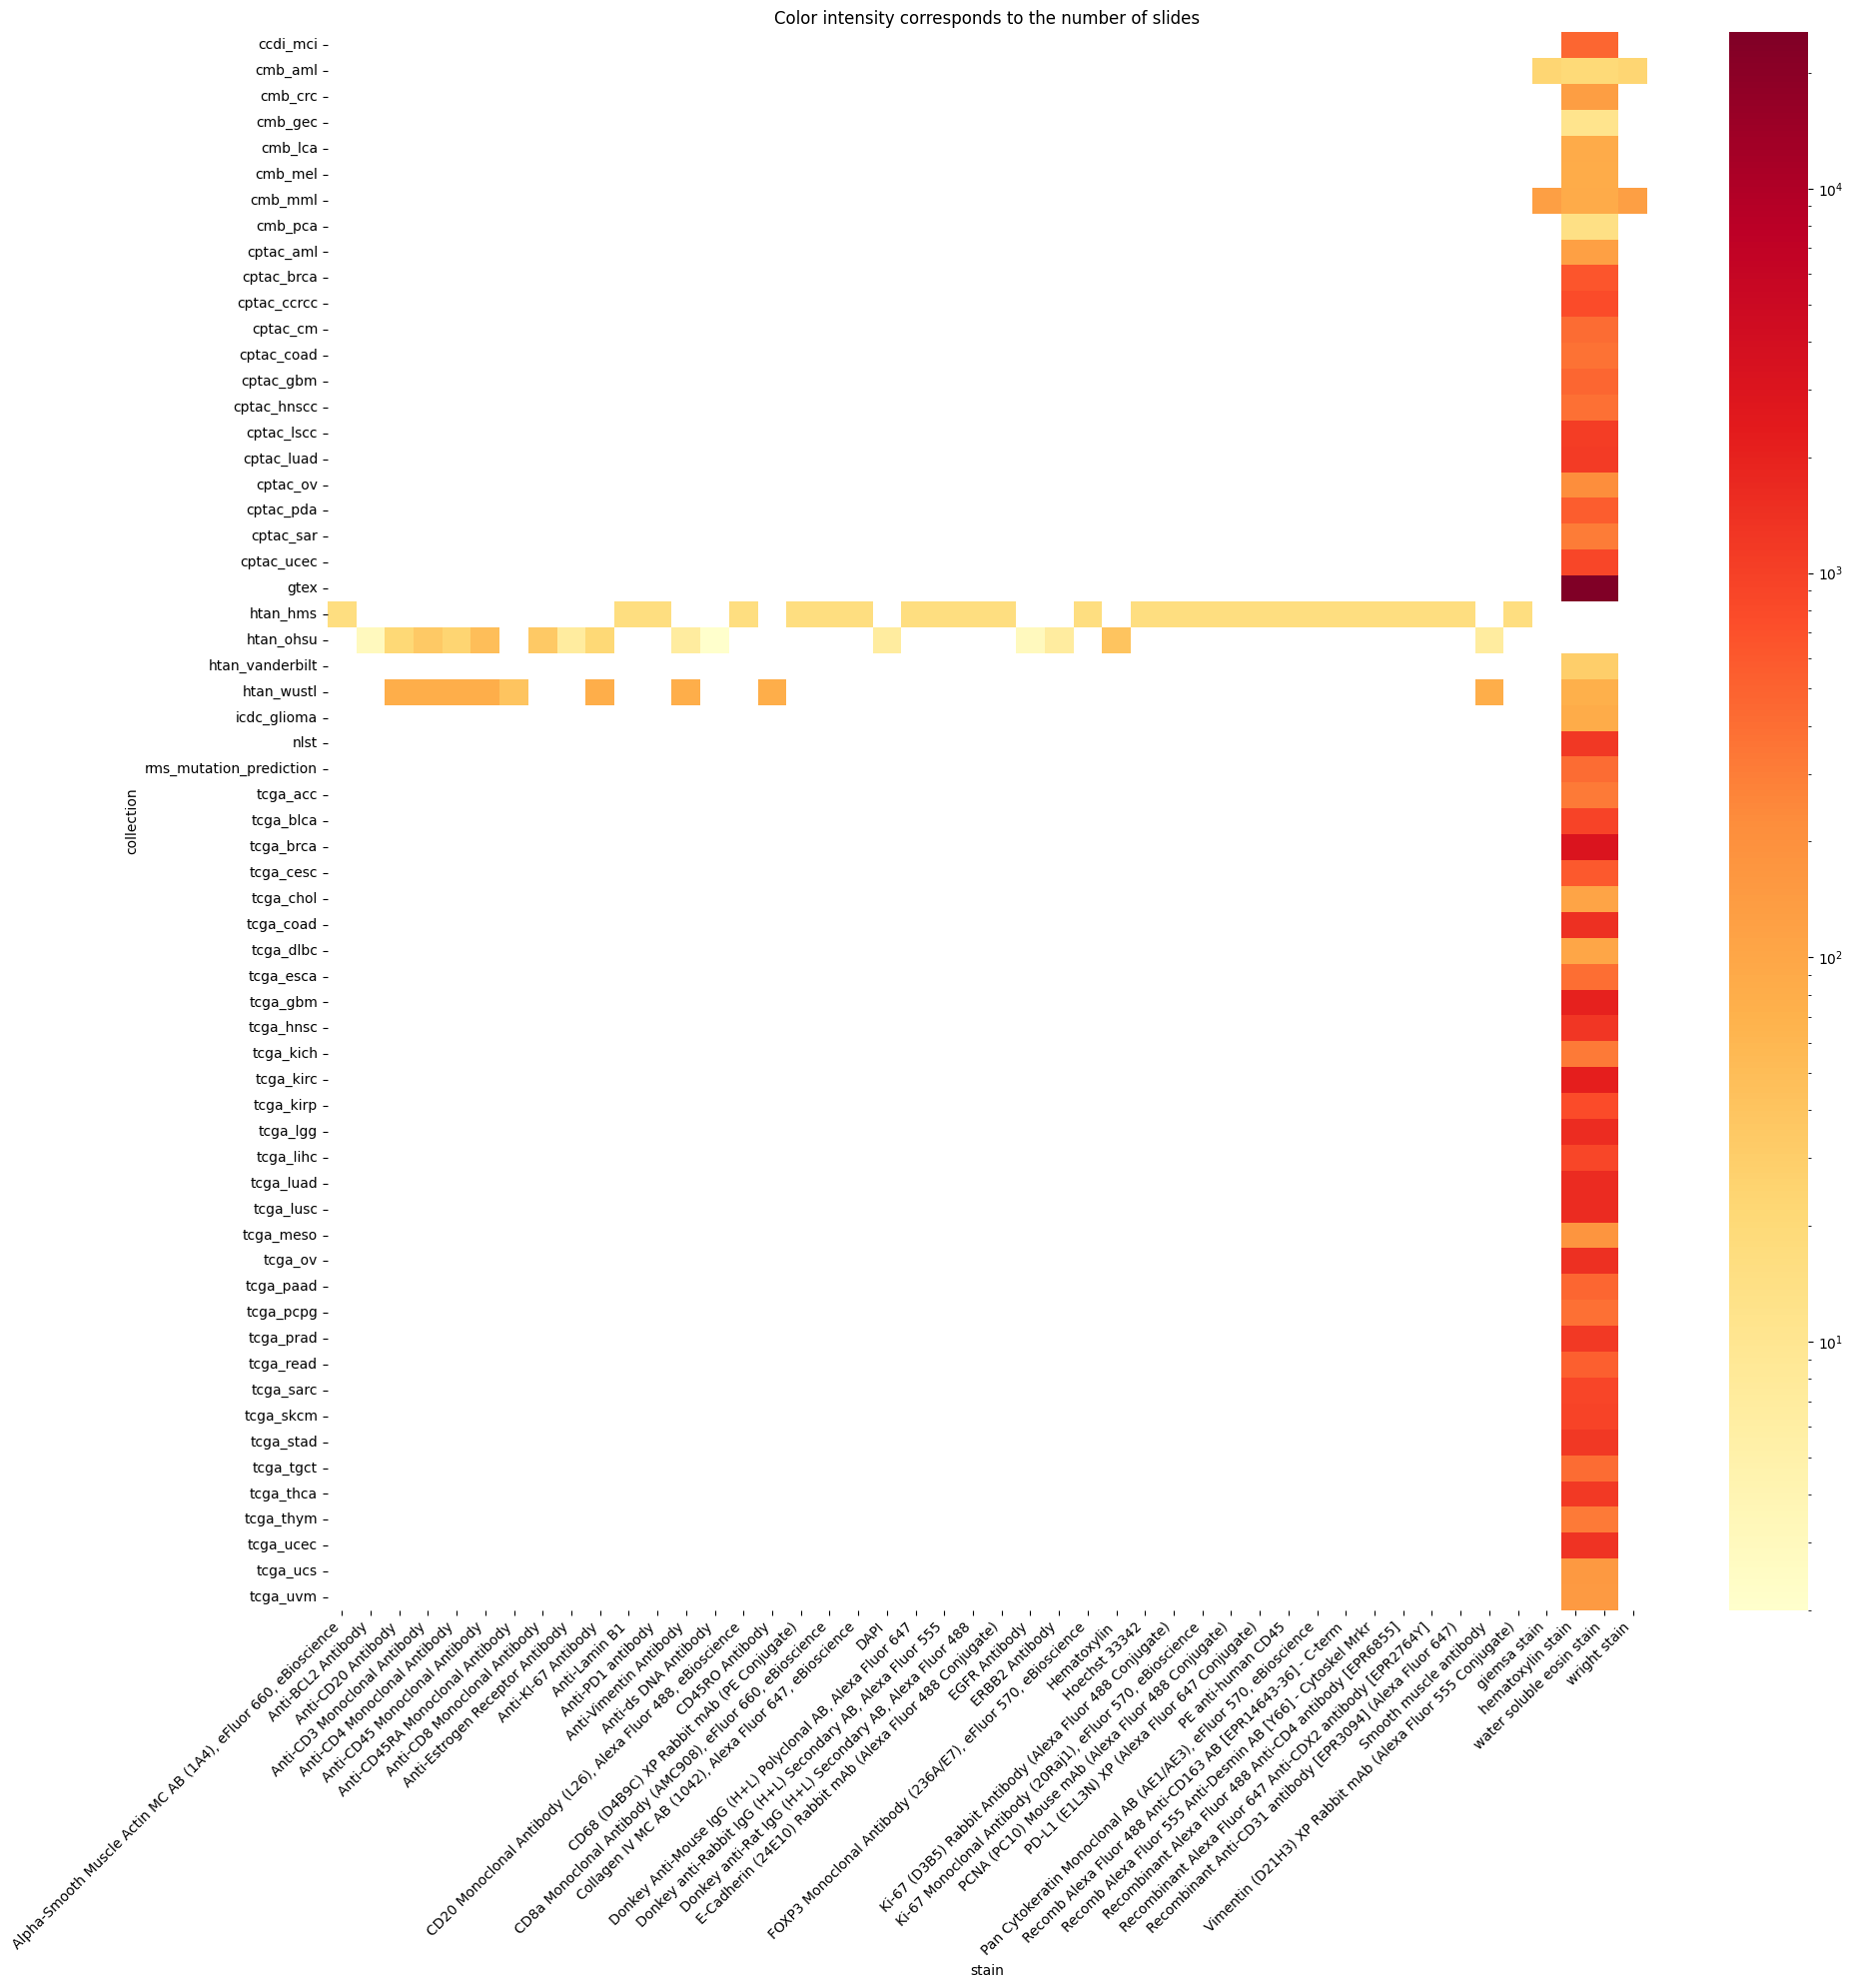

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Create a pivot table
pivot_table = sm_with_main.explode('staining_usingSubstance_CodeMeaning').pivot_table(values='SeriesInstanceUID', index='collection_id', columns='staining_usingSubstance_CodeMeaning', aggfunc='nunique', fill_value=0)

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_table, annot=False, cmap='YlOrRd', fmt='d', norm=LogNorm())

plt.title('Color intensity corresponds to the number of slides')
plt.xlabel('stain')
plt.ylabel('collection')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Downloading the image files

Once you found the slide(s) you need, you can download individual slides given `SeriesInstanceUID` using the `idc download` convenience command line tool installed as part of the `idc-index` package. The cell below will download the slide identified by `SeriesInstanceUID`=`1.3.6.1.4.1.5962.99.1.1963588793.523070908.1638346161337.2.0`, and will sort the downloaded files into the `collection_id>PatientID>StudyInstanceUID>SeriesInstanceUID` DICOM hierarchy.

You can also download the entire collection by passing its ID (just make sure you have enough disk space!).

In [ ]:
!idc download 1.3.6.1.4.1.5962.99.1.1963588793.523070908.1638346161337.2.0

2024-09-18 03:10:21,832 - Downloading from IDC v19 index
2024-09-18 03:10:22,017 - Identified matching SeriesInstanceUID: ['1.3.6.1.4.1.5962.99.1.1963588793.523070908.1638346161337.2.0']
2024-09-18 03:10:22,047 - Total size of files to download: 598.35 MB
2024-09-18 03:10:22,047 - Total free space on disk: 207.059263488GB
2024-09-18 03:10:22,227 - Not using s5cmd sync as the destination folder is empty or sync or progress bar is not requested
2024-09-18 03:10:22,228 - Initial size of the directory: 0 bytes
2024-09-18 03:10:22,228 - Approximate size of the files that need to be downloaded: 598350000.0 bytes
2024-09-18 03:10:31,802 - Successfully downloaded files to /content


## What's next?

You will find more tutorials in the [IDC-Tutorials](https://github.com/ImagingDataCommons/IDC-Tutorials) repository.

If you have not already, make sure to go over [this tutorial](https://github.com/ImagingDataCommons/IDC-Tutorials/blob/master/notebooks/pathomics/getting_started_with_digital_pathology.ipynb) to learn how DICOM images are organized, how to visualize them, and how to work with them using open source tools!

If you have any questions or suggestions about this tutorial or about IDC, please reach out to use in the [IDC Forum](https://discourse.canceridc.dev) or by email at support@canceridc.dev.